<a href="https://colab.research.google.com/github/VeerVikramSingh/ML/blob/master/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**

The goal is to predict survival of passengers travelling in RMS Titanic using Logistic regression

**Data Loading n Description :**

The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc.

The dataset comprises of 891 observations of 12 columns. Below is a table showing names of all the columns and their description

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [0]:
titanic_data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**data_Preprocessing:**

In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0],inplace=True)

In [0]:
titanic_data["Age"].fillna(titanic_data["Age"].median(),inplace=True)

In [0]:
titanic_data.drop("Cabin",axis=1,inplace=True)

In [0]:
titanic_data["Family_Size"]=titanic_data["SibSp"]+titanic_data["Parch"]+1

In [0]:
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

In [10]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [0]:
titanic_data.drop(["PassengerId","Name","Sex","SibSp","Parch","Ticket"],axis=1,inplace=True)

In [12]:
titanic_data.head(3)

,Survived,Pclass,Age,Fare,Embarked,Family_Size,GenderClass
0,0,3,22.0,7.2500,S,2,male
1,1,1,38.0,71.2833,C,2,female
2,1,3,26.0,7.9250,S,1,female


In [24]:
titanic_data.head(3)

,Survived,Pclass,Age,Fare,Embarked,Family_Size,GenderClass
0,0,3,22.0,7.2500,S,2,male
1,1,1,38.0,71.2833,C,2,female
2,1,3,26.0,7.9250,S,1,female


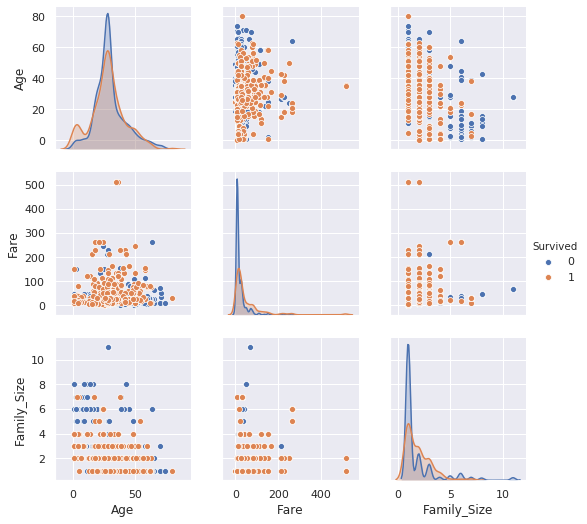

In [14]:
sns.pairplot(titanic_data,vars=["Age","Fare","Family_Size"],hue="Survived")

**Observation :**

More people of Pclass 1 survived than died (First peak of red is higher than blue)

More people of Pclass 3 died than survived (Third peak of blue is higher than red)

More people of age group 20-40 died than survived.


Most of the people paying less fare died

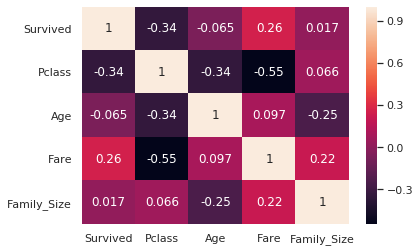

In [15]:
sns.heatmap(titanic_data.corr(),annot=True)

Age and Pclass are negatively corelated with Survived.

FamilySize is made from Parch and SibSb only therefore high positive corelation among them.

Fare and FamilySize are positively coorelated with Survived.

With high corelation we face redundancy issues.

**Random Forest Introduction :**

Random Forest is considered to be the panacea of all data science problems. On a funny note, when you can’t think of any algorithm (irrespective of situation), use random forest!

In Random Forest, we grow multiple trees as opposed to a single tree in CART model . To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest) and in case of regression, it takes the average of outputs by different trees.

Random Forest is a versatile machine learning method capable of performing both regression and classification tasks. It also undertakes dimensional reduction methods, treats missing values, outlier values and other essential steps of data exploration, and does a fairly good job. It is a type of ensemble learning method, where a group of weak models combine to form a powerful model.

**Real Life Analogy:**

Imagine a guy named Andrew, that want’s to decide, to which places he should travel during a one-year vacation trip. He asks people who know him for advice. First, he goes to a friend, tha asks Andrew where he traveled to in the past and if he liked it or not. Based on the answers, he will give Andrew some advice.

This is a typical decision tree algorithm approach. Andrews friend created rules to guide his decision about what he should recommend, by using the answers of Andrew.

Afterwards, Andrew starts asking more and more of his friends to advise him and they again ask him different questions, where they can derive some recommendations from. Then he chooses the places that where recommend the most to him, which is the typical Random Forest algorithm approach.

**Wisdom of Crowd -**

The Wisdom of Crowds” is an idea, summarized in the 2004 book by James Surowiecki by the same name, which states that the aggregate information in a group often leads to a better decision than any single member of the group.

It’s something that’s been empirically observed in many different areas of social science, and if some basic initial conditions are met, it usually holds up pretty well in the real world.

The premise is this – if you take a large enough group of people, all with independent judgments, and all with access to different levels and amounts of information, the overall group’s average judgment is usually better than any single individual judgment.

There have been many famous cases of Wisdom of Crowds at play – from guessing the weight of an ox at a county fair to asking the audience in the popular game show, Who Wants To Be A Millionaire.

If you are running a Random Forest model in your job or class, and you sift through some of the statistics and mathematics behind it, you are in effect applying some of the core concepts of the Wisdom of Crowds in your work. In his book, James Surowiecki lays out some of the basic elements that are required for the Wisdom of Crowds to work. Here’s how it compares to what Random Forest is actually doing.

Statistically speaking, Random Forest is simply trying to reduce the variance in prediction by averaging a large number of independent, uncorrelated, individual predictions

Philosophically, Random Forest is simply applying many of the ideas behind the Wisdom of Crowds.

**Concept behind Random Forest:-**

The random forest is a model made up of many decision trees. Rather than just being a forest though, this model is random because of two concepts:

Random sampling of data points

Splitting nodes based on subsets of features

**Random Sampling** :

One of the keys behind the random forest is that each tree trains on random samples of the data points.

The samples are drawn with replacement (known as bootstrapping) which means that some samples will be trained on in a single tree multiple times (we can also disable this behavior if we want).

The idea is that by training each tree on different samples, although each tree might have high variance with respect to a particular set of the training data, overall, the entire forest __will have __low variance.

This procedure of training each individual learner on different subsets of the data and then averaging the predictions is known as bagging, short for bootstrap aggregating.

To more clearly understand bagging summarised below are the steps to follow:

**Create Multiple DataSets:**

Sampling is done with replacement on the original data and new datasets are formed.

The new data sets can have a fraction of the columns as well as rows, which are generally hyper-parameters in a bagging model

Taking row and column fractions less than 1 helps in making robust models, less prone to overfitting

**Build Multiple Classifiers**:

Classifiers are built on each data set.
Generally the same classifier is modeled on each data set and predictions are made.

**Combine Classifiers:**

The predictions of all the classifiers are combined using either mean or mode value depending on the problem at hand.
Generally mean are used for regression problems and mode is used for classification problems.
The combined values are generally more robust than a single model.

**Random Subset of Features:>**

Another concept behind the random forest is that only a subset of all the features are considered for splitting each node in each decision tree. 

Generally this is set to sqrt(n_features) meaning that at each node, the decision tree considers splitting on a sample of the features totaling the square root of the total number of features.

The random forest can also be trained considering all the features at every node. (These options can be controlled in the Scikit-Learn random forest implementation).

The random forest combines hundreds or thousands of decision trees, trains each one on a slightly different set of the observations (sampling the data points with replacement) and also splits nodes in each tree considering only a limited number of the features. The final predictions made by the random forest are made by averaging the predictions of each individual tree.

**Advantages_Random_Forest:>**

It can be used for both regression and classification tasks and that it’s easy to view the relative importance it assigns to the input features.

Random forest classifier handle the missing values on its own.

Random Forest is also considered as a very handy and easy to use algorithm, because it’s default hyperparameters often produce a good prediction result. The number of hyperparameters is also not that high and they are straightforward to understand.

One of the big problems in machine learning is overfitting, but most of the time this won’t happen that easy to a random forest classifier. That’s because if there are enough trees in the forest, the classifier won’t overfit the model.

**Shortcomings_Random_Forest:>**

The main limitation of Random Forest is that a large number of trees can make the algorithm slow and ineffective for real-time predictions. 

In general, these algorithms are fast to train, but quite slow to create predictions once they are trained. A more accurate prediction requires more trees, which results in a slower model. 

In most real-world applications the random forest algorithm is fast enough, but there can certainly be situations where run-time performance is important and other approaches would be preferred.

Random Forest is a predictive modeling tool and not a descriptive tool. That means, if you are looking for a description of the relationships in your data, other approaches would be preferred.

Random Forest can feel like a black box approach for statistical modelers – you have very little control on what the model does. You can at best – try different parameters and random seeds!

**Use Cases:>**

The random forest algorithm is used in a lot of different fields like:

**Banking**

In Banking it is used for example to detect customers who will use the bank’s services more frequently than others and repay their debt in time. In this domain it is also used to detect fraud customers who want to scam the bank.

**Stock Market**

In finance, it is used to determine a stock’s behaviour in the future.

**Medicine**

In the healthcare domain it is used to identify the correct combination of components in medicine and to analyze a patient’s medical history to identify diseases.

**E-Commerce**
To determine whether a customer will actually like the product or not.

In [16]:
titanic_data.head(3)

,Survived,Pclass,Age,Fare,Embarked,Family_Size,GenderClass
0,0,3,22.0,7.2500,S,2,male
1,1,1,38.0,71.2833,C,2,female
2,1,3,26.0,7.9250,S,1,female


In [0]:
x=titanic_data.loc[:,titanic_data.columns!="Survived"]
y=titanic_data.Survived
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [18]:
print(x_train.shape)
print(y_train.shape)

(712, 6)
(712,)


In [21]:
x_train.shape

(712, 6)

In [22]:
y_train.shape

(712,)

In [23]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=0)
model.fit(x_train,y_train)

ValueError: ignored

In [37]:
import pandas as pd
titanic_data=pd.get_dummies(titanic_data,columns=["GenderClass","Embarked"],drop_first=True)

KeyError: ignored

In [38]:
titanic_data.head()

,Survived,Pclass,Age,Fare,Family_Size,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,0,1,0,1
1,1,1,38.0,71.2833,2,1,0,0,0
2,1,3,26.0,7.9250,1,1,0,0,1
3,1,1,35.0,53.1000,2,1,0,0,1
4,0,3,35.0,8.0500,1,0,1,0,1


In [0]:
x=titanic_data.loc[:,titanic_data.columns!="Survived"]
y=titanic_data["Survived"]

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [0]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=0)

In [47]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred_test=model.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test,y_pred_test)

0.770949720670391

In [0]:
model1=RandomForestClassifier(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)

In [52]:
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred1_test=model1.predict(x_test)

In [56]:
accuracy_score(y_test,y_pred1_test)

0.770949720670391

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix=pd.DataFrame(confusion_matrix(y_test,y_pred_test))
print(confusion_matrix)

    0   1
0  94  12
1  29  44


In [58]:
confusion_matrix.index=["Actual died","Actual Survived"]
confusion_matrix.columns=["Predicted died","Predicted Survived"]
print(confusion_matrix)

                 Predicted died  Predicted Survived
Actual died                  94                  12
Actual Survived              29                  44




*   now will check accuracy through Gridsearch CV



In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(model, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)